## Term Deposit Subscription Project


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [1]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Azubi Assesment/'
file_name ='final_data.xlsx'
sheet = 'bank-full'

In [5]:
banks = pd.read_excel(file_path+file_name, sheet_name=sheet) ##  Fill the blank to read the data

In [7]:
# copying data to another variable to avoid any changes to original data
data = banks.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Understand the shape of the dataset

In [10]:
data.shape

(45211, 17)

### Check the data types of the columns for the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# checking for duplicate values
data.duplicated().sum()

0

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Fixing the negative values in number of employees columns

In [14]:
# Number of clients who were not previously contacted
data.loc[data["pdays"] < 0].shape

(36954, 17)

#### Let's check the count of each unique category in each of the categorical variables

In [15]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------------------------------------
no     44396
yes      815
Name: default, dtype: int64
--------------------------------------------------
yes    25130
no     20081
Name: housing, dtype: int64
--------------------------------------------------
no     37967
yes     7244
Name: loan, dtype: int64
--------------------------------------------------
cellular     29285
unknown      13020
telephone     2906
Na

### Univariate Analysis

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on age

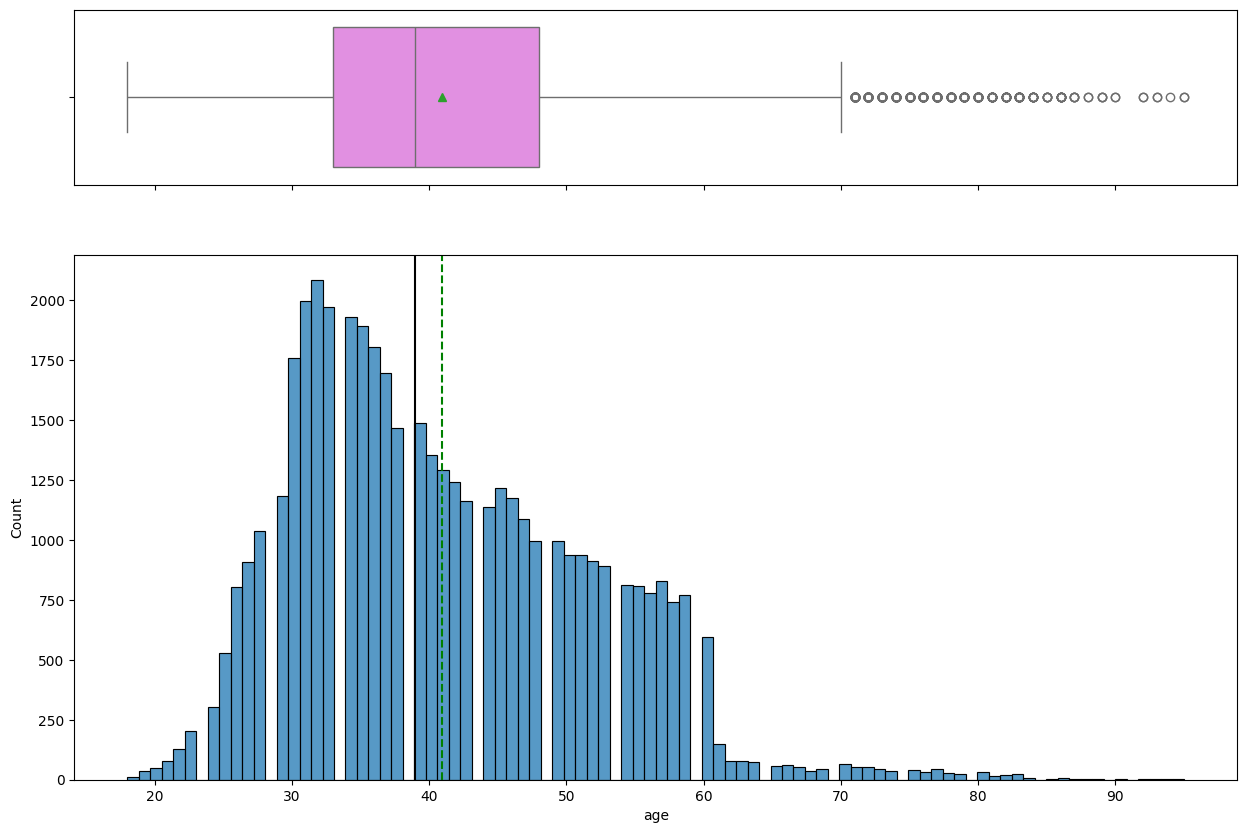

In [17]:
histogram_boxplot(data, "age")

#### Observations on balance

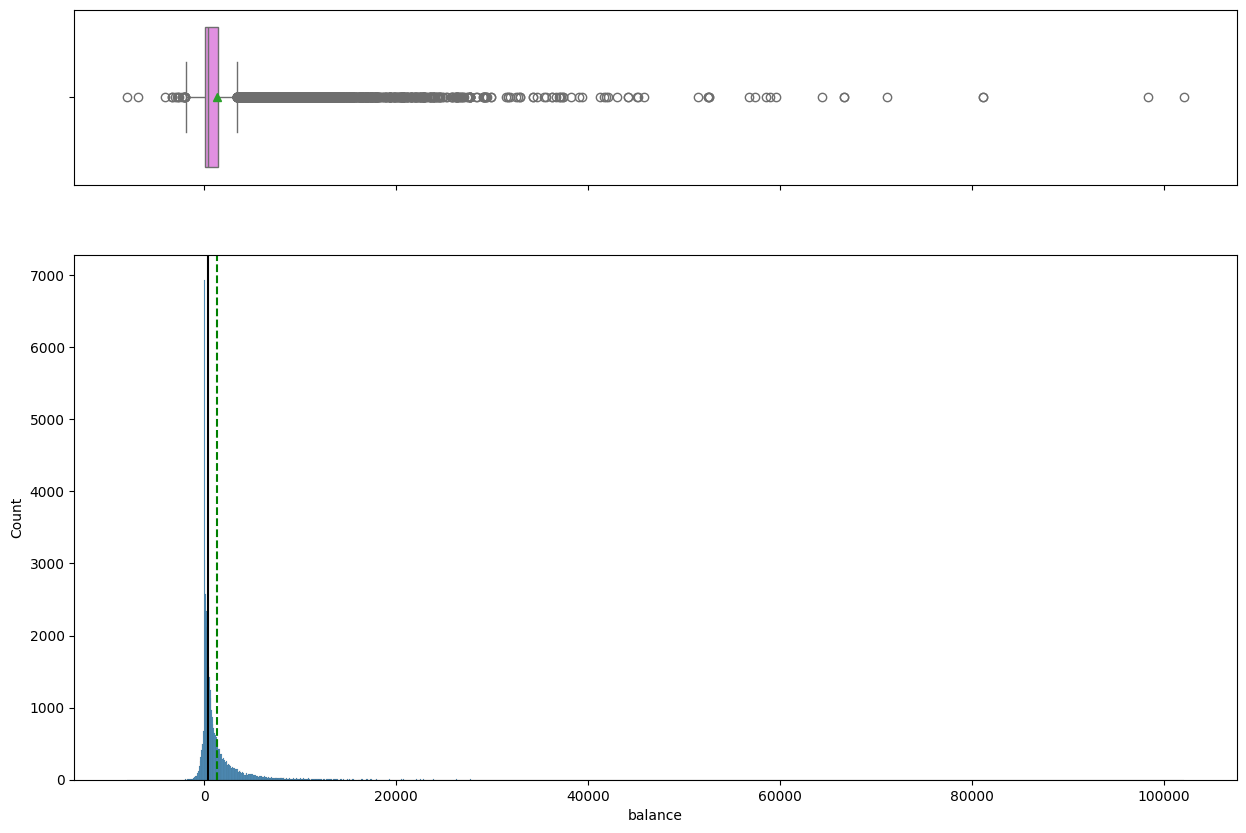

In [18]:
histogram_boxplot(data,"balance")

In [19]:
# checking the observations which have a balance less than zero
data.loc[data["balance"] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


In [20]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on job

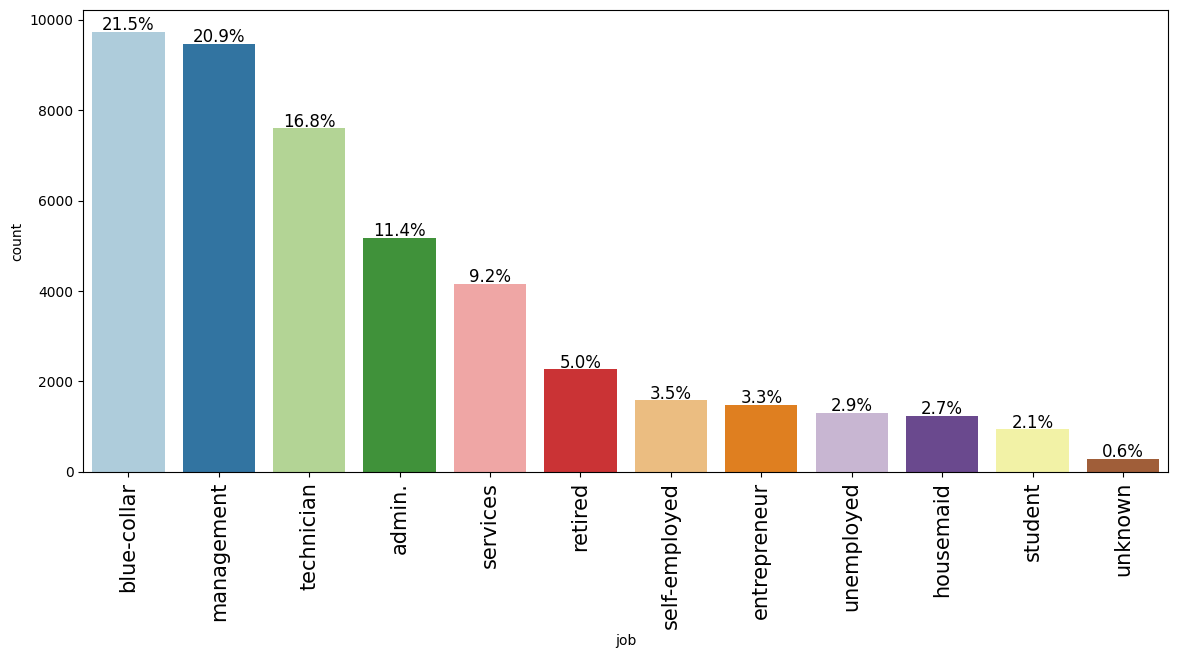

In [21]:
labeled_barplot(data, "job", perc=True)

#### Observations on education

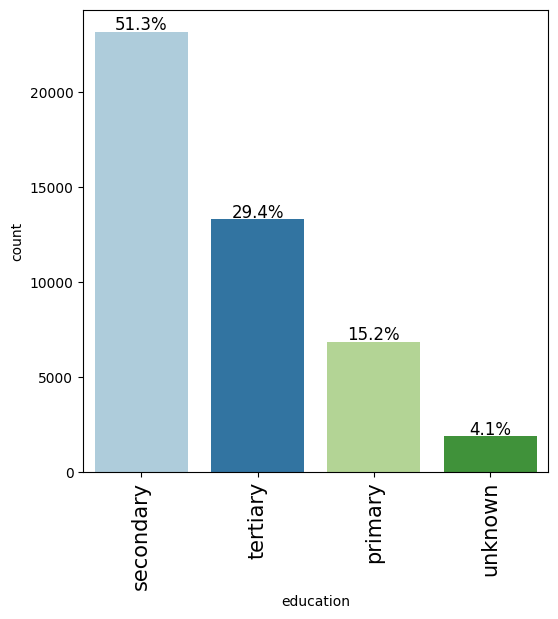

In [22]:
labeled_barplot(data, "education", perc=True) 

#### Observations on loan

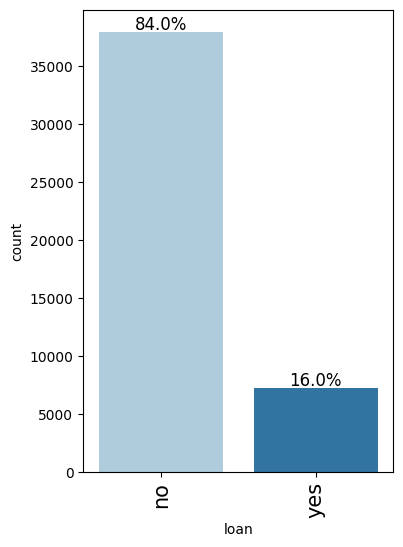

In [23]:
labeled_barplot(data, "loan", perc=True) 

#### Observations on poutcome

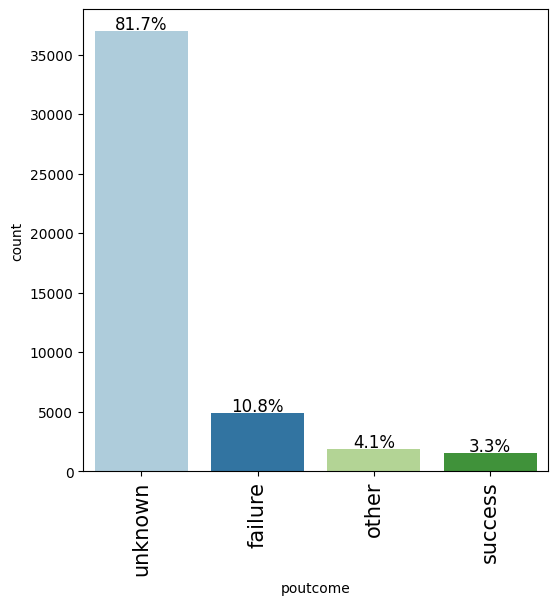

In [24]:
labeled_barplot(data, "poutcome", perc=True)

### Observations on marital



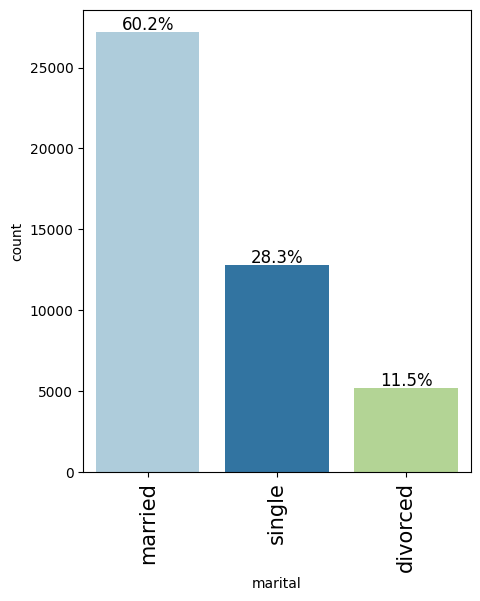

In [25]:
labeled_barplot(data, "marital", perc=True)

#### Observations on default

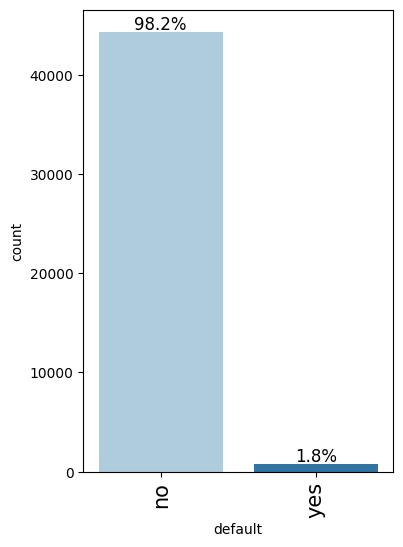

In [26]:
labeled_barplot(data, "default", perc=True)

#### Observations on month


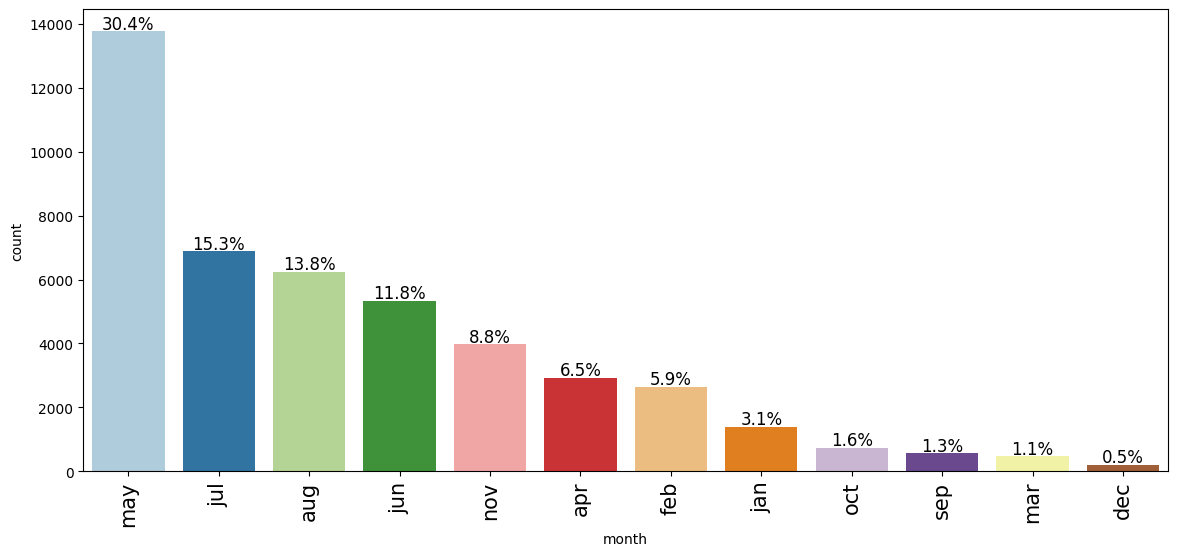

In [27]:
labeled_barplot(data, "month", perc=True)

#### Observations on day

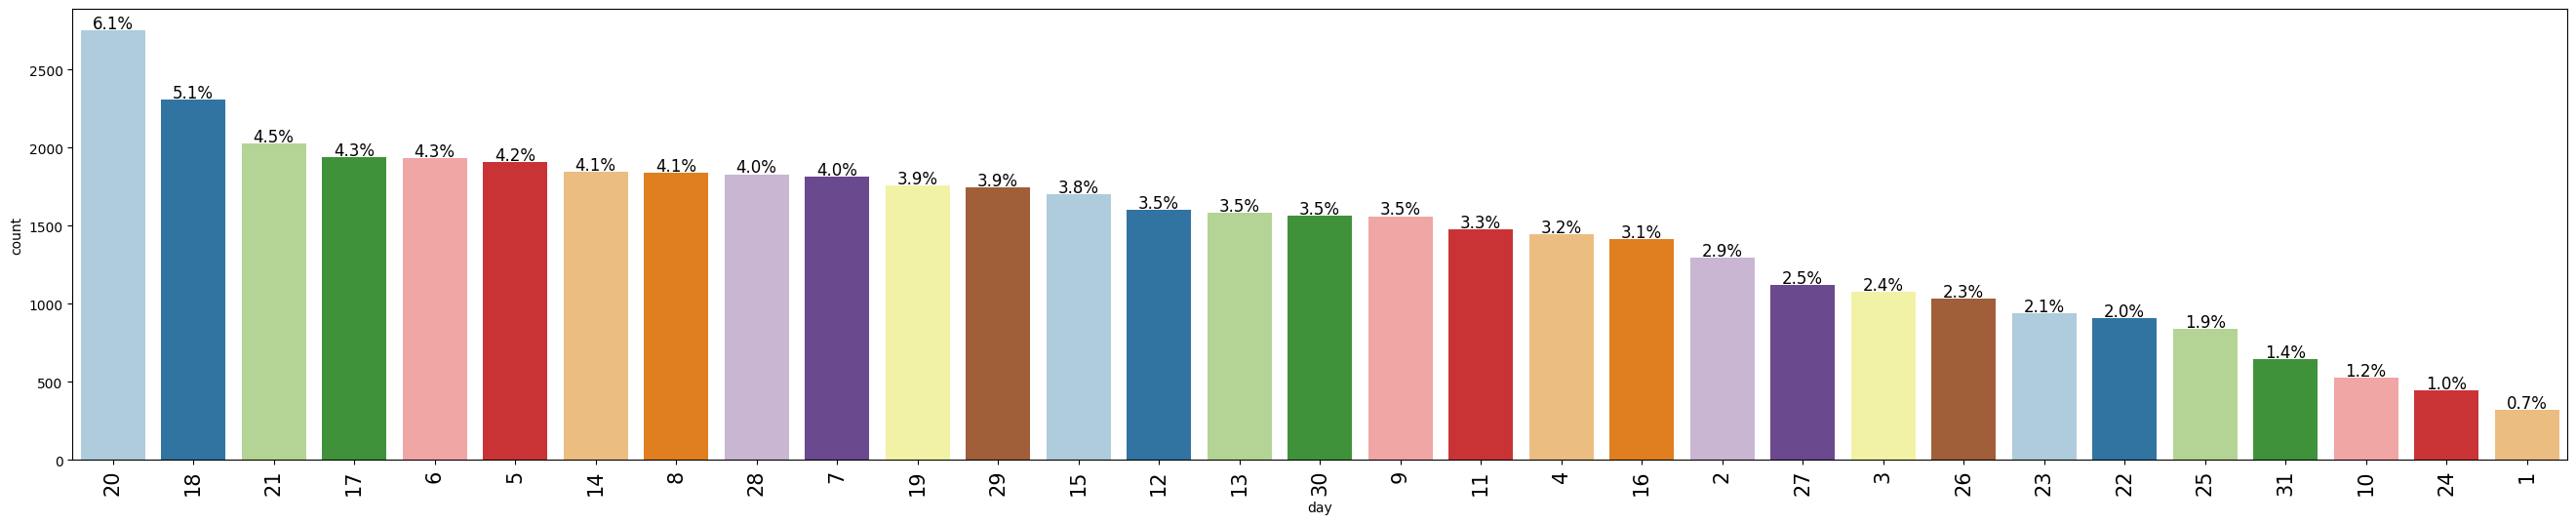

In [28]:
labeled_barplot(data, "day", perc=True)

### Bivariate Analysis

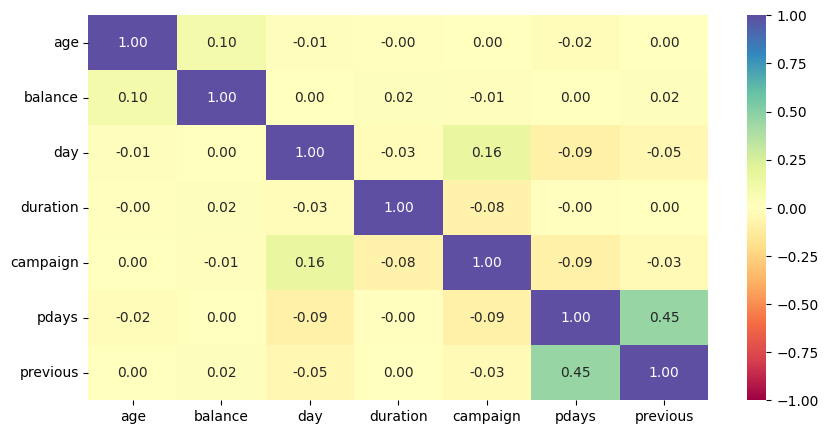

In [29]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [30]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [31]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Observations on marital (stacked)

y            no   yes    All
marital                     
All       39922  5289  45211
married   24459  2755  27214
single    10878  1912  12790
divorced   4585   622   5207
------------------------------------------------------------------------------------------------------------------------


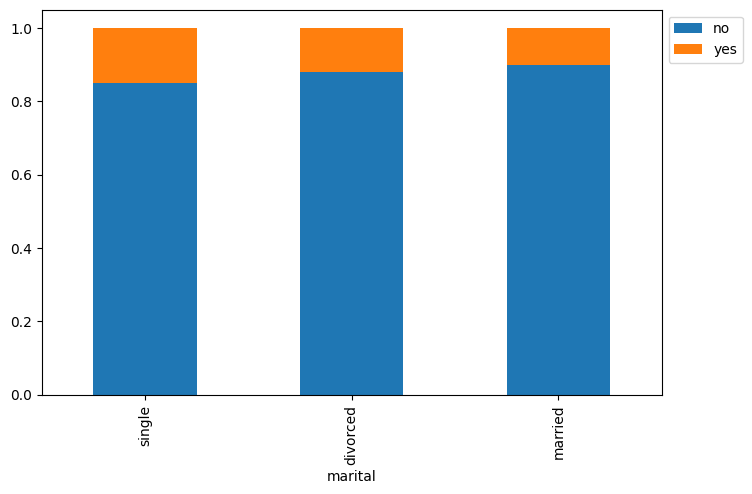

In [32]:
stacked_barplot(data, "marital", "y")

#### Observations on education and term deposit (heatmap)

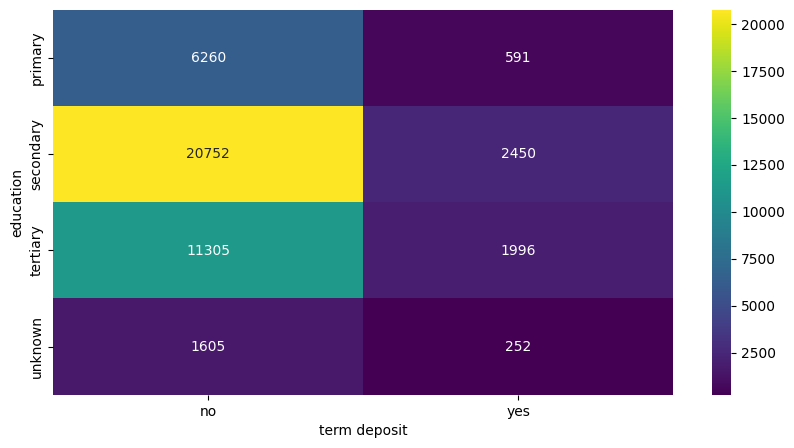

In [33]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education"], data["y"]),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("education")
plt.xlabel("term deposit")
plt.show()

#### Observations on marital and term deposit (heatmap)

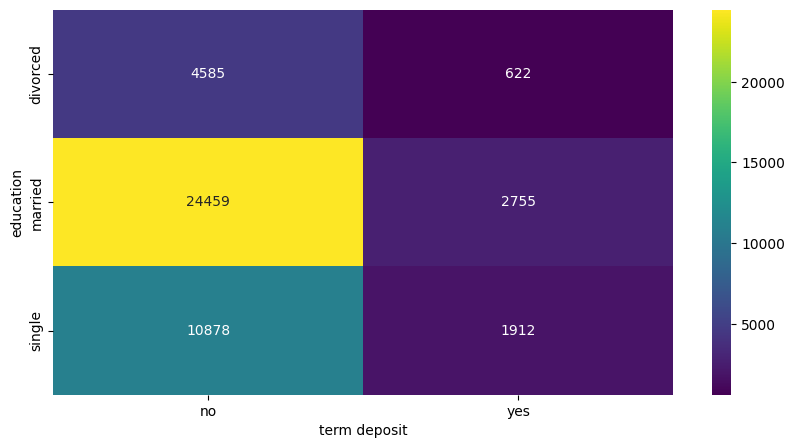

In [34]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["marital"], data["y"]),
    annot=True,
    fmt="g",
    cmap="viridis"
) 

plt.ylabel("martial")
plt.xlabel("term deposit")
plt.show()

#### Observations on month and term deposit (stacked)

y         no   yes    All
month                    
All    39922  5289  45211
may    12841   925  13766
aug     5559   688   6247
jul     6268   627   6895
apr     2355   577   2932
jun     4795   546   5341
feb     2208   441   2649
nov     3567   403   3970
oct      415   323    738
sep      310   269    579
mar      229   248    477
jan     1261   142   1403
dec      114   100    214
------------------------------------------------------------------------------------------------------------------------


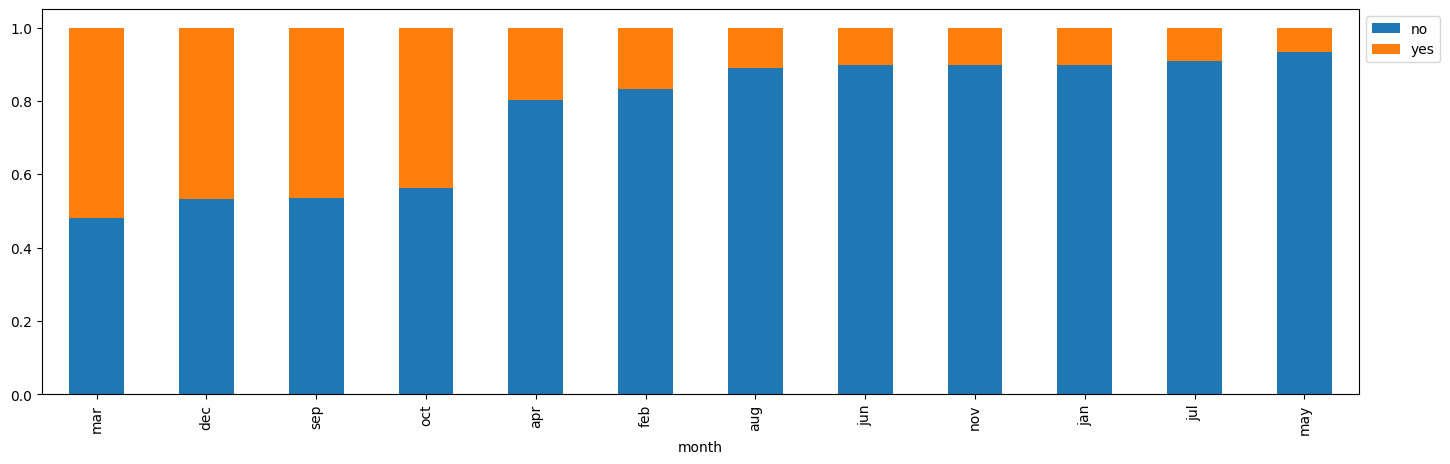

In [35]:
stacked_barplot(data, "month", "y")

#### Observations on marital and balance (box plot)

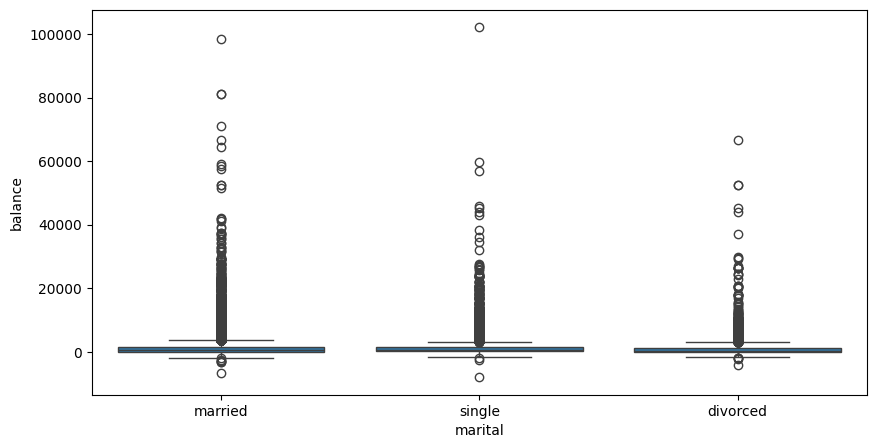

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(data, x="marital", y="balance")
plt.show()

#### Observations on education and balance (box plot)

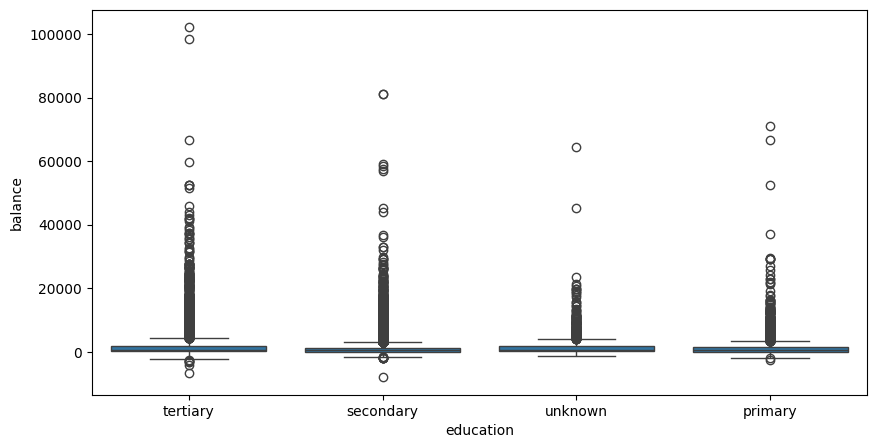

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data, x="education", y="balance")
plt.show()

## Data Preprocessing

#### Outlier Check

- Let's check for outliers in the data.

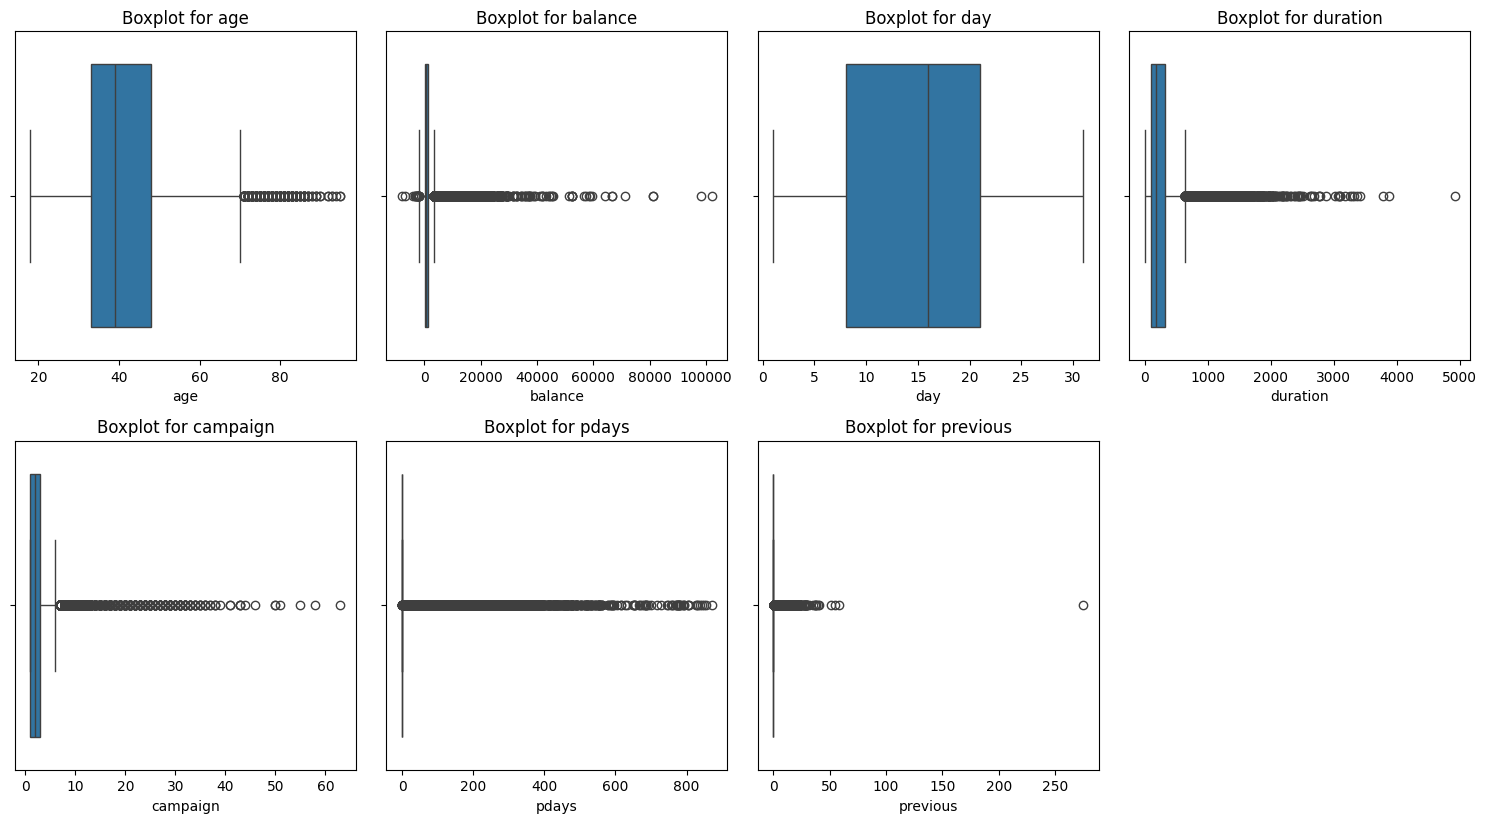

In [39]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)  # Adjust the layout for the number of subplots
    sns.boxplot(data=data, x=variable)
    plt.title(f'Boxplot for {variable}')

plt.tight_layout()
plt.show()

In [40]:
import numpy as np
# Calculate the 25th and 75th percentiles for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to keep values within the bounds
data_filtered = data.copy()
for col in numerical_cols:
    data_filtered = data_filtered[(data_filtered[col] >= lower_bound[col]) & (data_filtered[col] <= upper_bound[col])]

# Display the shape of the original and filtered dataframes to see how many rows were removed
print("Original data shape:", data.shape)
print("Filtered data shape:", data_filtered.shape)

Original data shape: (45211, 17)
Filtered data shape: (28193, 17)


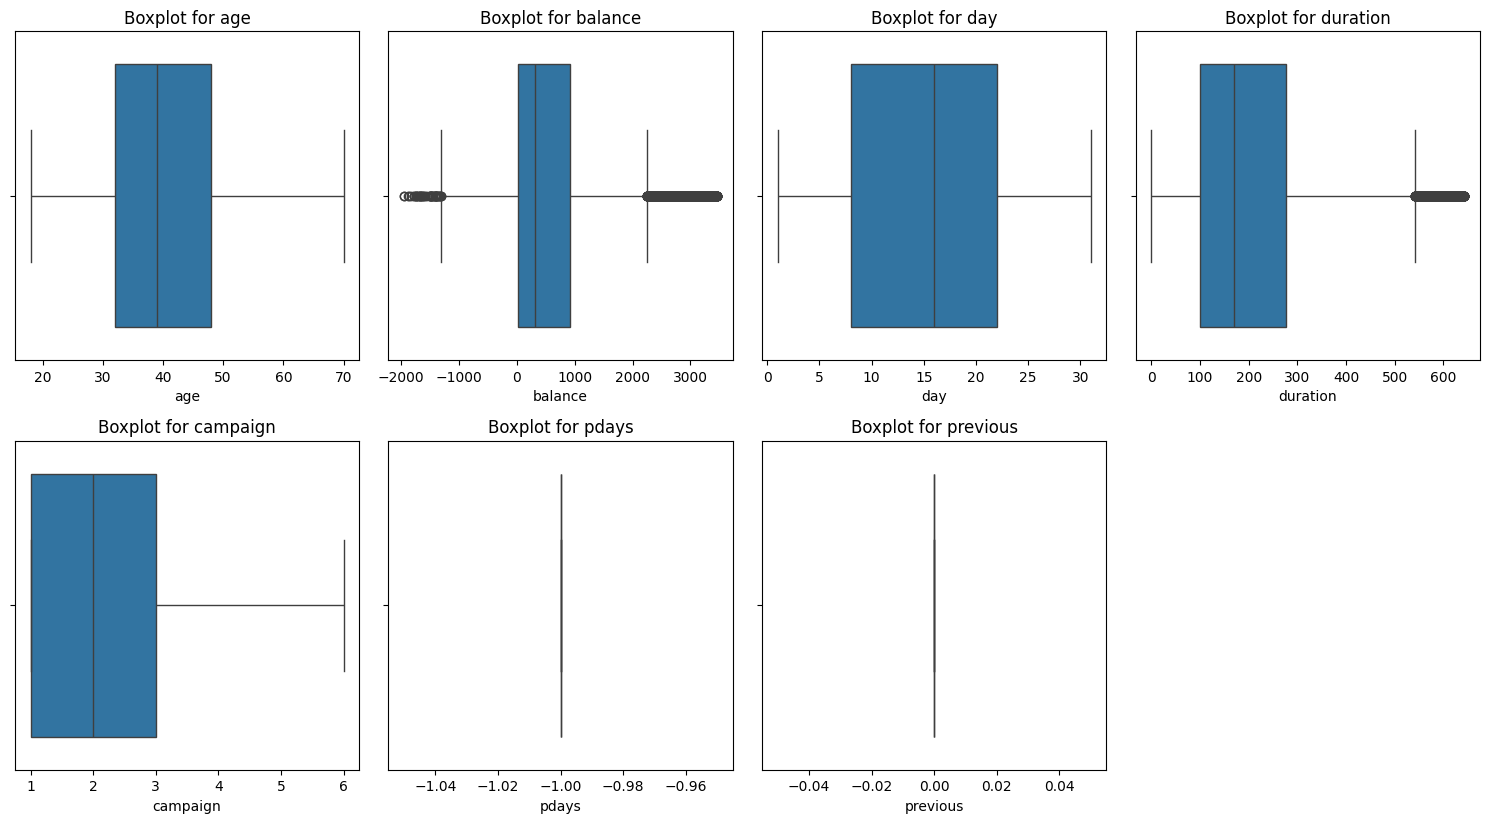

In [41]:
# outlier detection using boxplot
numeric_columns = data_filtered.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)  # Adjust the layout for the number of subplots
    sns.boxplot(data=data_filtered, x=variable)
    plt.title(f'Boxplot for {variable}')

plt.tight_layout()
plt.show()

#### Class Imbalance (outliers removed)

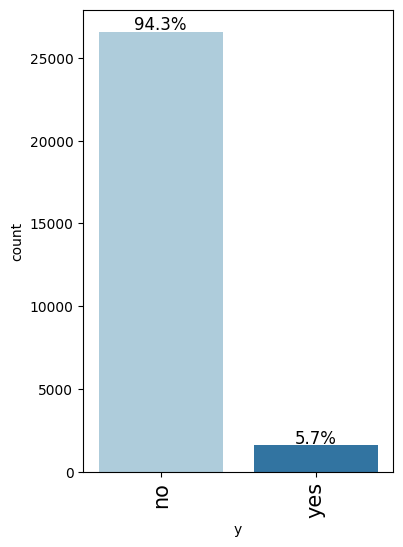

In [42]:
labeled_barplot(data_filtered, "y", perc=True)

#### Class Imbalance (outliers included)

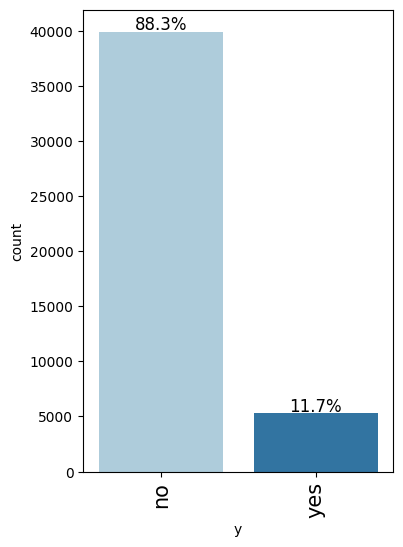

In [43]:
labeled_barplot(data, "y", perc=True)

### Feature Selection



### Data Preparation for modeling

#### Feature Selection
- We want to predict the using only statistically significant features

#### Data Preprocessing
- We want to change the feature that has the number of days after a client was contated to a catergorical value showing whether they were contacted or not
- We want to predict which which clients will take a term deposit.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [44]:
# changing pdays to a categorical value
data["contacted_before"] = data["pdays"].apply(lambda x: "no" if x < 0 else "yes")
data.drop(columns=["pdays"], inplace=True)

In [45]:
data["y"] = data["y"].apply(lambda x: 1 if x == "yes" else 0)

data_dummies = pd.get_dummies(data, drop_first=True)

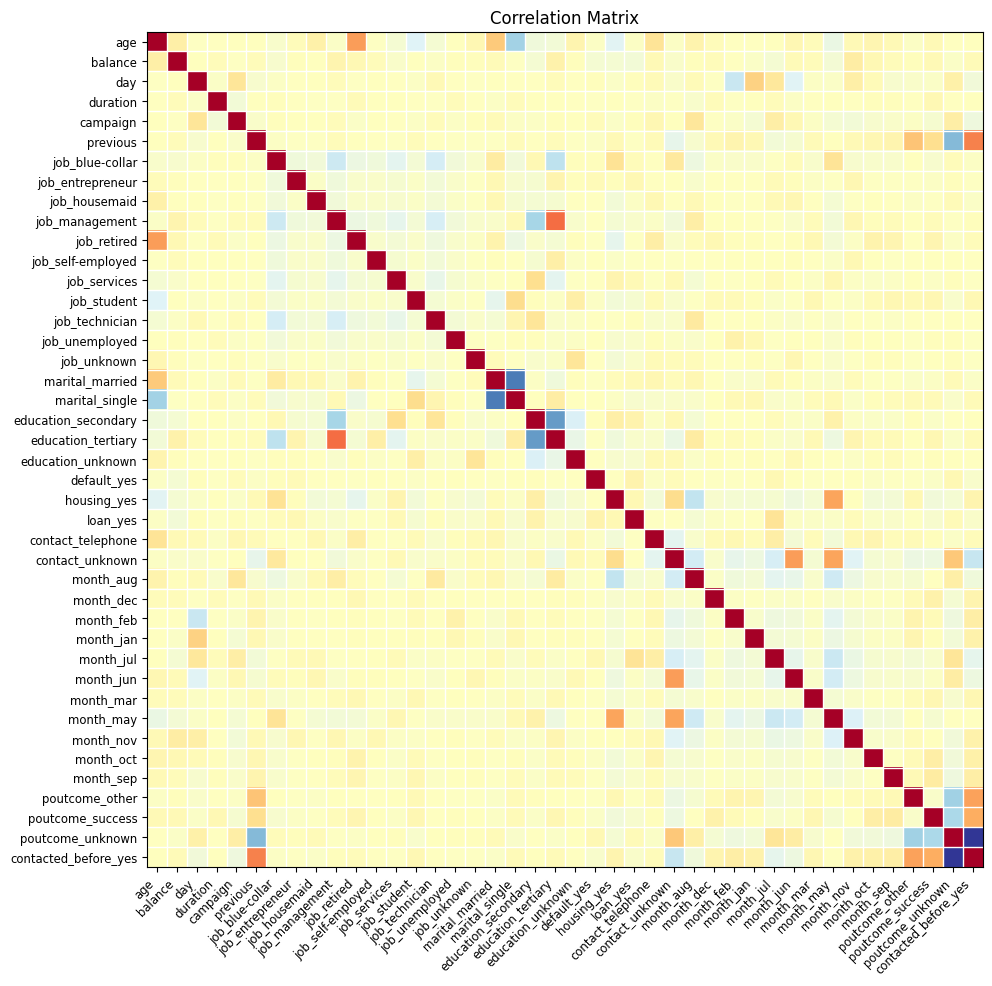

In [46]:
# Importing the function to plot the correlation matrix from statsmodels
from statsmodels.graphics.correlation import plot_corr
import matplotlib.pyplot as plt

# Create a new figure with a specific size for the correlation plot
fig, ax = plt.subplots(figsize=(10,10)) # Create figure and axes object

# Plot the correlation matrix (excluding 'Exam_Score') using the plot_corr function
# The xnames argument sets the labels for the columns in the correlation matrix
plot_corr(data_dummies.drop(columns=['y']).corr(),
          xnames = data_dummies.drop(columns=['y']).corr().columns,
          ax = ax) # Pass the created axes object to plot_corr
plt.show() # Add plt.show() to display the plot

In [48]:
# Dropping the 'y' column and calculating the correlation of the remaining features
# with the 'age' column. The result is sorted to show correlations in ascending order.
data_dummies.drop(columns=['y']).corr()['age'].sort_values()

,age
marital_single,-0.427817
job_student,-0.197302
housing_yes,-0.185513
month_may,-0.127431
education_secondary,-0.093979
education_tertiary,-0.081629
job_technician,-0.068632
job_services,-0.065780
job_blue-collar,-0.044002
job_management,-0.023571


In [49]:
# Calculate correlations between predictor variables and the response variable
corrs = data_dummies.corr()['y'].sort_values(ascending=False)
corrs

,y
y,1.000000
duration,0.394521
poutcome_success,0.306788
contacted_before_yes,0.167263
month_mar,0.129456
month_oct,0.128531
month_sep,0.123185
previous,0.093236
job_retired,0.079245
job_student,0.076897


In [50]:
from scipy.stats import pearsonr
# Build a dictionary of correlation coefficients and p-values
p_val_list = []  # List to store p-values for each feature

# Get the list of feature names excluding 'y'
column_titles = [col for col in corrs.index if col != 'y']

# Loop through each feature to calculate the Pearson correlation coefficient and p-value
for col in column_titles:
    # Pearson correlation test between the feature and 'y'
    p_val = round(pearsonr(data_dummies[col], data_dummies['y'])[1], 6)
    # Append the p-value to the list
    p_val_list.append(p_val)

# Create a DataFrame containing the variable names, correlation coefficients, and p-values
data_p_val = pd.DataFrame({
    'Variable_Name': list(corrs.index)[1:],  # Excluding 'y' from the variable names
    'Correlation_Coefficient': list(corrs.values)[1:],  # Corresponding correlation coefficients
    'P_Value': p_val_list  # List of p-values for each feature
})

In [51]:
data_p_val

,Variable_Name,Correlation_Coefficient,P_Value
0,duration,0.394521,0.000000
1,poutcome_success,0.306788,0.000000
2,contacted_before_yes,0.167263,0.000000
3,month_mar,0.129456,0.000000
4,month_oct,0.128531,0.000000
5,month_sep,0.123185,0.000000
6,previous,0.093236,0.000000
7,job_retired,0.079245,0.000000
8,job_student,0.076897,0.000000
9,month_dec,0.075164,0.000000


If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could infer that the following features are statistically significant

In [52]:
# Sort the DataFrame by the P-Value column in ascending order
data_p_val_sorted = data_p_val.sort_values('P_Value')

# Filter and display rows where the P-Value is less than 0.05 (statistically significant correlations)
data_p_val_sorted[data_p_val_sorted['P_Value'] < 0.05]

,Variable_Name,Correlation_Coefficient,P_Value
0,duration,0.394521,0.000000
39,housing_yes,-0.139173,0.000000
38,month_may,-0.102500,0.000000
37,campaign,-0.073172,0.000000
36,job_blue-collar,-0.072083,0.000000
35,loan_yes,-0.068185,0.000000
34,marital_married,-0.060260,0.000000
33,education_secondary,-0.036388,0.000000
32,month_jul,-0.034382,0.000000
31,day,-0.028348,0.000000


In [53]:
# Extract the names of variables with statistically significant correlations (P-Value < 0.05)
data_p_val[data_p_val['P_Value'] < 0.05]['Variable_Name'].values

array(['duration', 'poutcome_success', 'contacted_before_yes',
       'month_mar', 'month_oct', 'month_sep', 'previous', 'job_retired',
       'job_student', 'month_dec', 'education_tertiary', 'marital_single',
       'balance', 'month_feb', 'job_management', 'poutcome_other', 'age',
       'job_unemployed', 'contact_telephone', 'education_unknown',
       'month_nov', 'job_housemaid', 'month_jun', 'job_entrepreneur',
       'default_yes', 'job_services', 'day', 'month_jul',
       'education_secondary', 'marital_married', 'loan_yes',
       'job_blue-collar', 'campaign', 'month_may', 'housing_yes',
       'contact_unknown', 'poutcome_unknown'], dtype=object)

In [54]:
# Model building - Independent Variable (IV) DataFrame
X_names = list(data_p_val[data_p_val['P_Value'] < 0.05]['Variable_Name'].values)

X = data_dummies.drop(columns=["y"])[X_names] ## Complete the code to drop case status from the data
Y = data_dummies["y"]

In [56]:
# Initialize the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1, stratify=Y)

In [58]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (36168, 37)
Shape of test set :  (9043, 37)
Percentage of classes in training set:
0    0.883018
1    0.116982
Name: y, dtype: float64
Percentage of classes in test set:
0    0.883003
1    0.116997
Name: y, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the client subscribed to a term deposit but in reality, the client did not.
2. Model predicts that the client did not subscribe to a term deposit but in reality, the client did.

### Which case is more important?
* Both the cases are important as:


### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [60]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [61]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

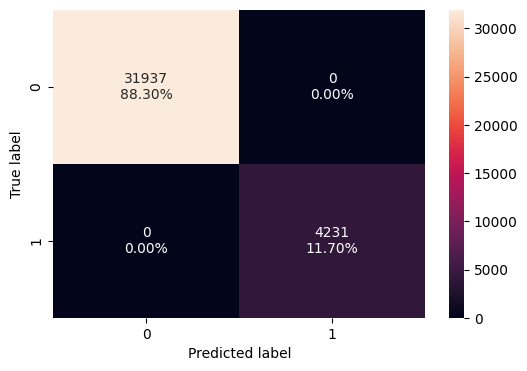

In [62]:
confusion_matrix_sklearn(model, X_train, y_train)

In [63]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Performance Metrics:

#### Checking model performance on test set

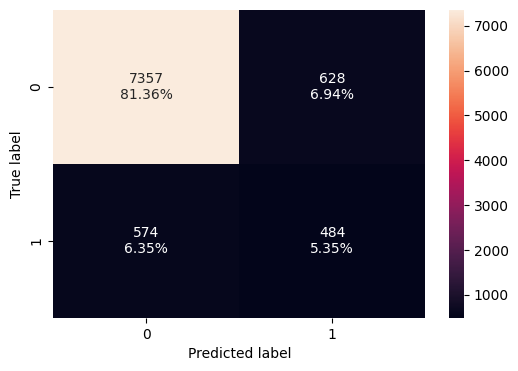

In [64]:
confusion_matrix_sklearn(model, X_test, y_test)

In [65]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) 
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86708,0.457467,0.435252,0.446083


Performance Metrics:


#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

### Hyperparameter Tuning - Decision Tree

In [66]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    estimator=dtree_estimator,
    param_grid=parameters,
    scoring=scorer,
    cv=5,
    n_jobs=-1
)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking model performance on training set

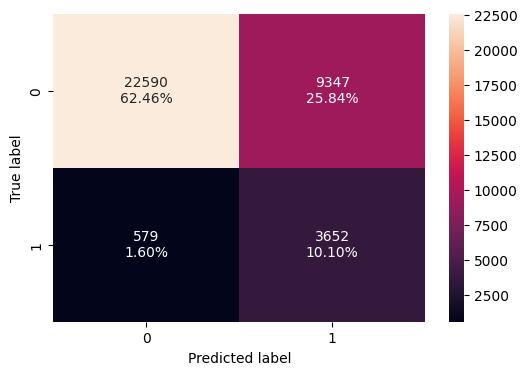

In [67]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [68]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.725559,0.863153,0.280945,0.423912


#### Checking model performance on testing set

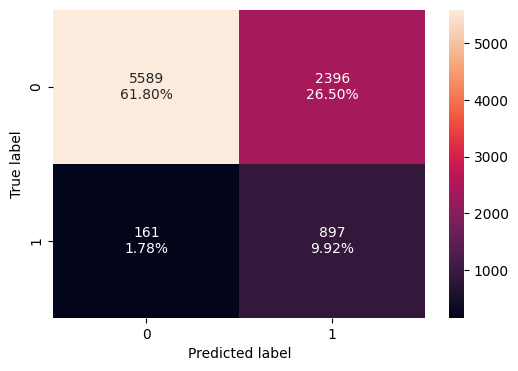

In [69]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [70]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71724,0.847826,0.272396,0.412319


## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [71]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train) 

BaggingClassifier(random_state=1)

#### Checking model performance on training set

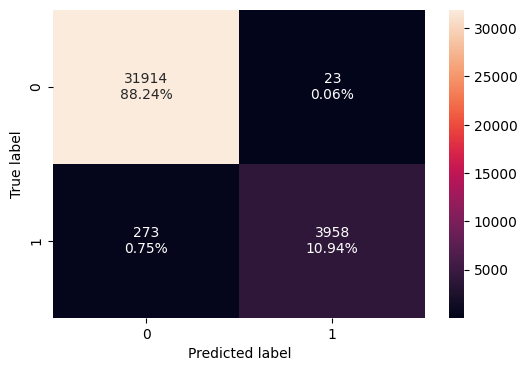

In [72]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [73]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.991816,0.935476,0.994223,0.963955


#### Checking model performance on test set

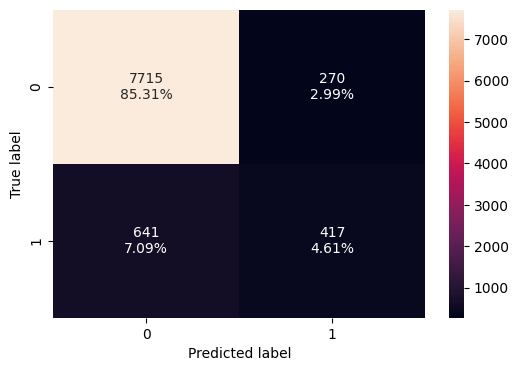

In [74]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [75]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.899259,0.39414,0.606987,0.477937


### Hyperparameter Tuning - Bagging Classifier

In [76]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, cv=5, scoring=acc_scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

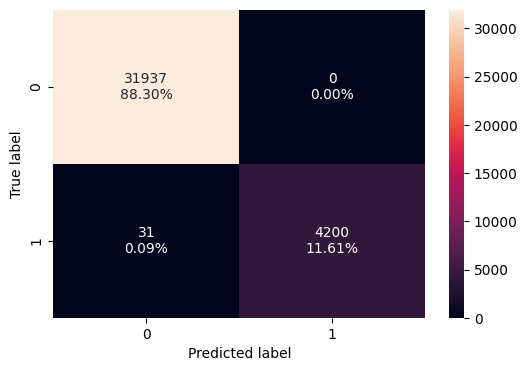

In [77]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [78]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999143,0.992673,1.0,0.996323


#### Checking model performance on test set

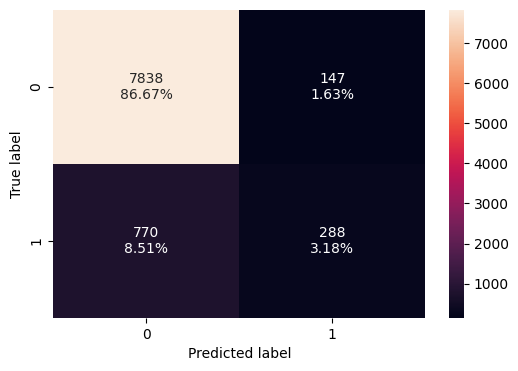

In [79]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [80]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.898596,0.272212,0.662069,0.3858


### Random Forest

In [81]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

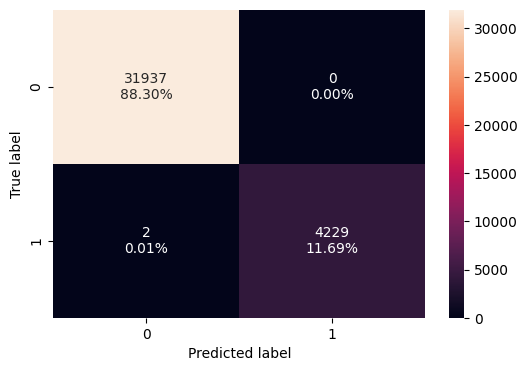

In [82]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [83]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999945,0.999527,1.0,0.999764


#### Checking model performance on test set

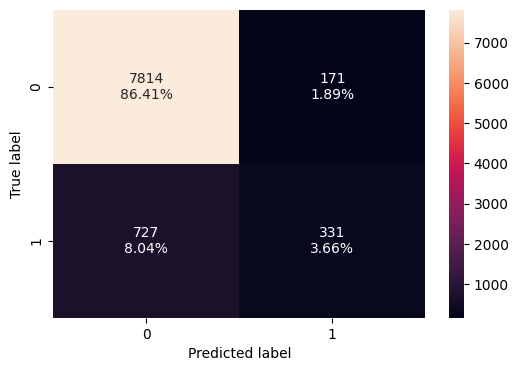

In [84]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [85]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.900697,0.312854,0.659363,0.424359


### Hyperparameter Tuning - Random Forest

In [86]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=False, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=rf_tuned, param_grid=parameters, cv=5, n_jobs=-1, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       random_state=1)

#### Checking model performance on training set

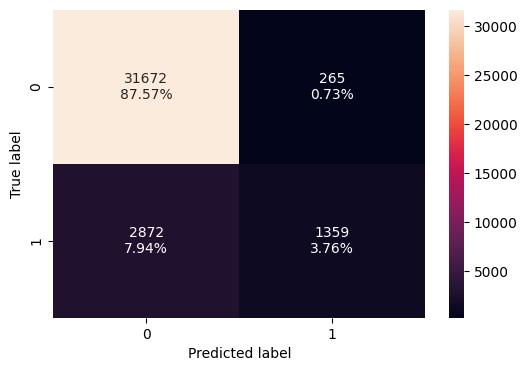

In [87]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [88]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.913266,0.321201,0.836823,0.464219


#### Checking model performance on test set

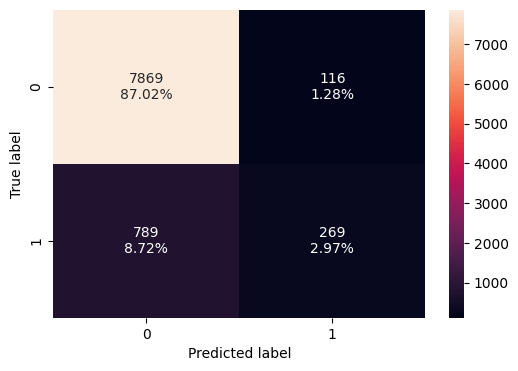

In [89]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [90]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.899923,0.254253,0.698701,0.372834


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [91]:
ab_classifier = AdaBoostClassifier(random_state=1) 
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

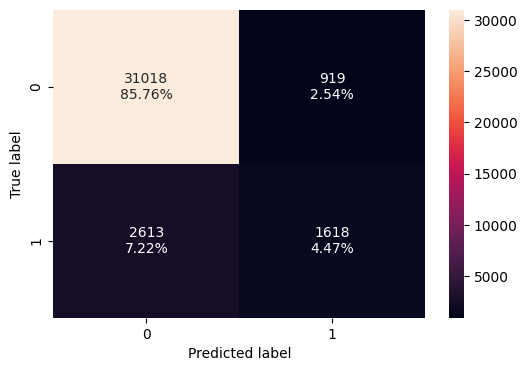

In [92]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train) 

In [93]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.902345,0.382416,0.637761,0.478132


#### Checking model performance on test set

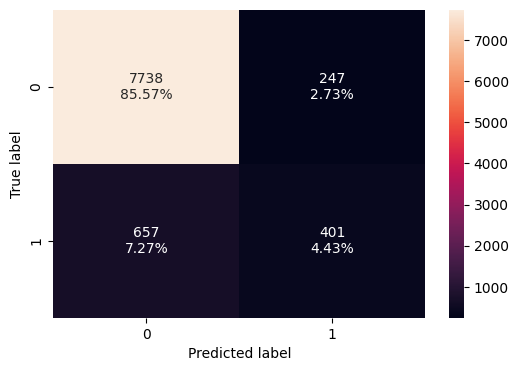

In [94]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [95]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.900033,0.379017,0.618827,0.470106


Peformance Metrics:

### Hyperparameter Tuning - AdaBoost Classifier

In [96]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=abc_tuned, param_grid=parameters, cv=5, scoring=acc_scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

#### Checking model performance on training set

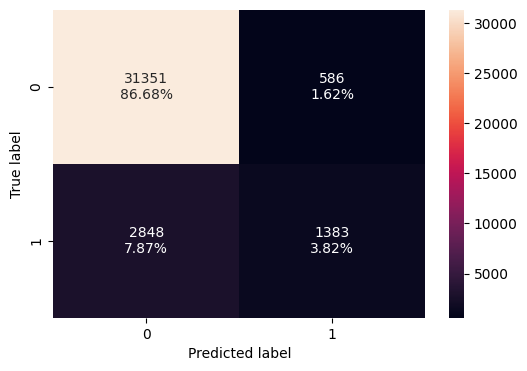

In [97]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [98]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.905054,0.326873,0.702387,0.446129


Peformance Metrics:

#### Checking model performance on test set

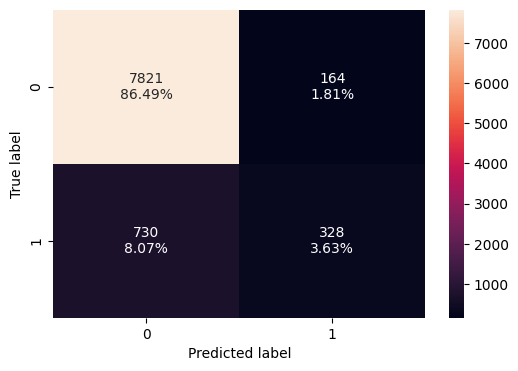

In [99]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [100]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.901139,0.310019,0.666667,0.423226


Peformance Metrics:

### Gradient Boosting Classifier

In [101]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

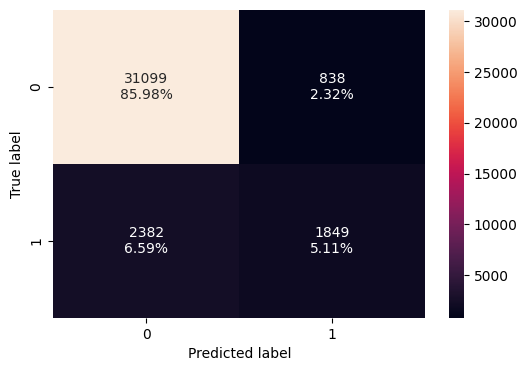

In [102]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [103]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.910971,0.437013,0.688128,0.534548


Peformance Metrics:


#### Checking model performance on test set

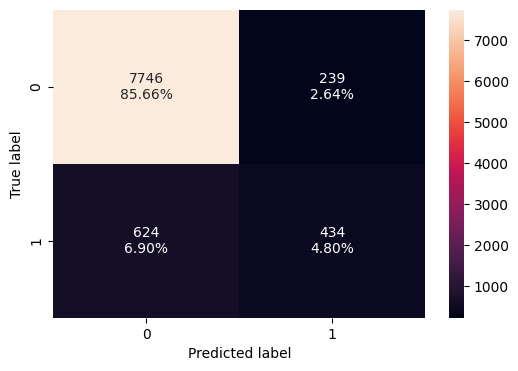

In [104]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [105]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.904567,0.410208,0.644874,0.501444


Peformance Metrics:


### Hyperparameter Tuning - Gradient Boosting Classifier

In [106]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=gbc_tuned, param_grid=parameters, cv=5, scoring=acc_scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.7)

#### Checking model performance on training set

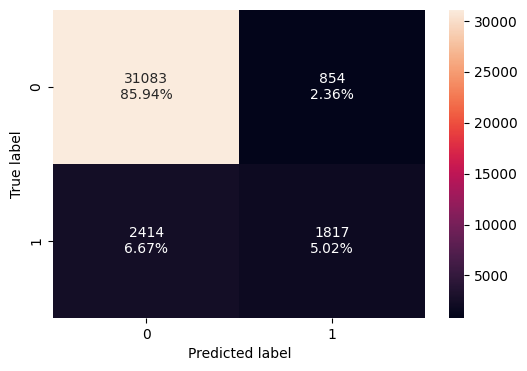

In [107]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [108]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.909644,0.429449,0.68027,0.526514


Peformance Metrics:

#### Checking model performance on test set

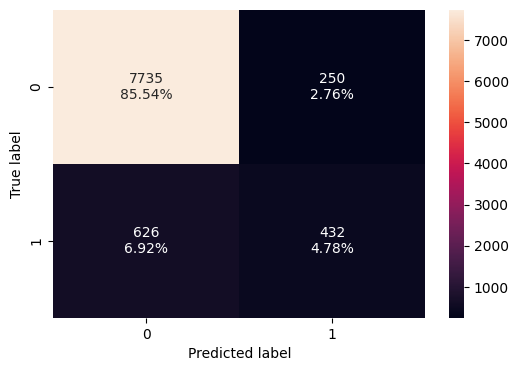

In [109]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [110]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test) 
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.903129,0.408318,0.633431,0.496552


### XGBoost Classifier

In [111]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

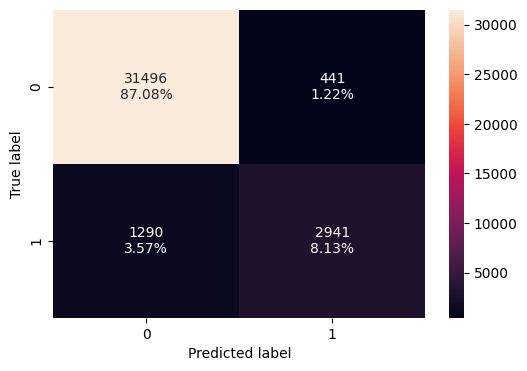

In [112]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [113]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.95214,0.695108,0.869604,0.772626


#### Checking model performance on test set

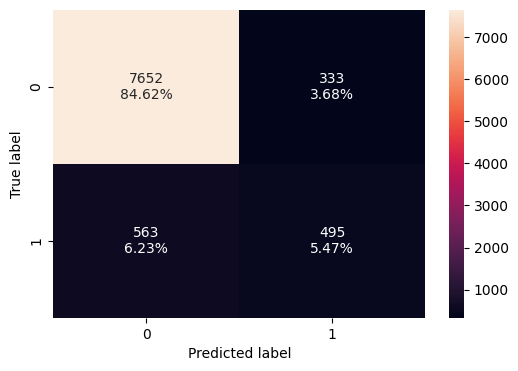

In [114]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [115]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.900918,0.467864,0.597826,0.52492


### Hyperparameter Tuning - XGBoost Classifier

In [116]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=xgb_tuned, param_grid=parameters, scoring=acc_scorer, cv=5, n_jobs=-1) 
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

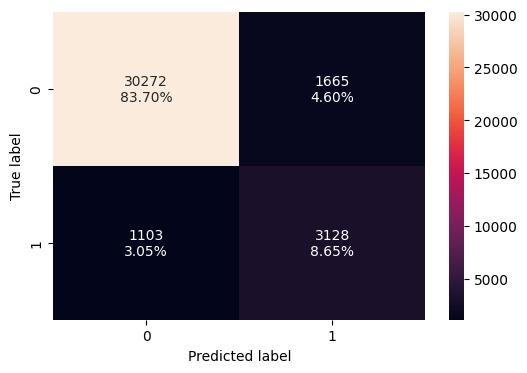

In [117]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train) 

In [118]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.923468,0.739305,0.652618,0.693262


#### Checking model performance on test set

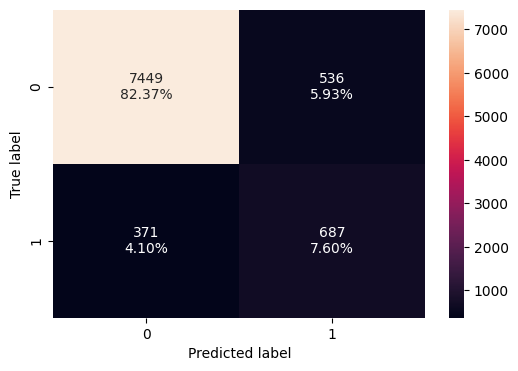

In [119]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [120]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.899701,0.649338,0.561733,0.602367


## Stacking Classifier

In [121]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator, n_jobs=-1) 

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       random_state=1))],
                   final_estimator=XGBClassifier(...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...),
                   n_jobs=-1)

### Checking model performance on training set

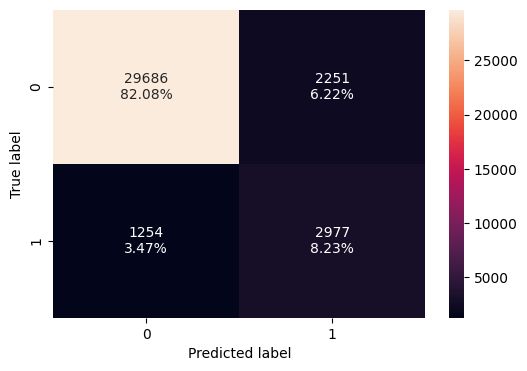

In [122]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [123]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.903091,0.703616,0.569434,0.629453


### Checking model performance on test set

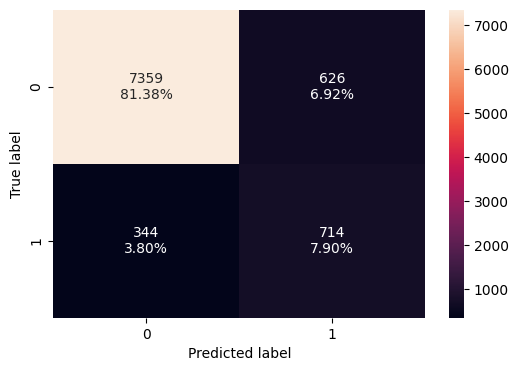

In [124]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [125]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.892735,0.674858,0.532836,0.595496


## Model Performance Comparison and Final Model Selection

In [126]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.725559,0.991816,0.999143,0.999945,0.913266,0.902345,0.905054,0.910971,0.909644,0.952140,0.923468,0.903091
Recall,1.0,0.863153,0.935476,0.992673,0.999527,0.321201,0.382416,0.326873,0.437013,0.429449,0.695108,0.739305,0.703616
Precision,1.0,0.280945,0.994223,1.000000,1.000000,0.836823,0.637761,0.702387,0.688128,0.680270,0.869604,0.652618,0.569434
F1,1.0,0.423912,0.963955,0.996323,0.999764,0.464219,0.478132,0.446129,0.534548,0.526514,0.772626,0.693262,0.629453


In [127]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.867080,0.717240,0.899259,0.898596,0.900697,0.899923,0.900033,0.901139,0.904567,0.903129,0.900918,0.899701,0.892735
Recall,0.457467,0.847826,0.394140,0.272212,0.312854,0.254253,0.379017,0.310019,0.410208,0.408318,0.467864,0.649338,0.674858
Precision,0.435252,0.272396,0.606987,0.662069,0.659363,0.698701,0.618827,0.666667,0.644874,0.633431,0.597826,0.561733,0.532836
F1,0.446083,0.412319,0.477937,0.385800,0.424359,0.372834,0.470106,0.423226,0.501444,0.496552,0.524920,0.602367,0.595496


### Important features of the final model

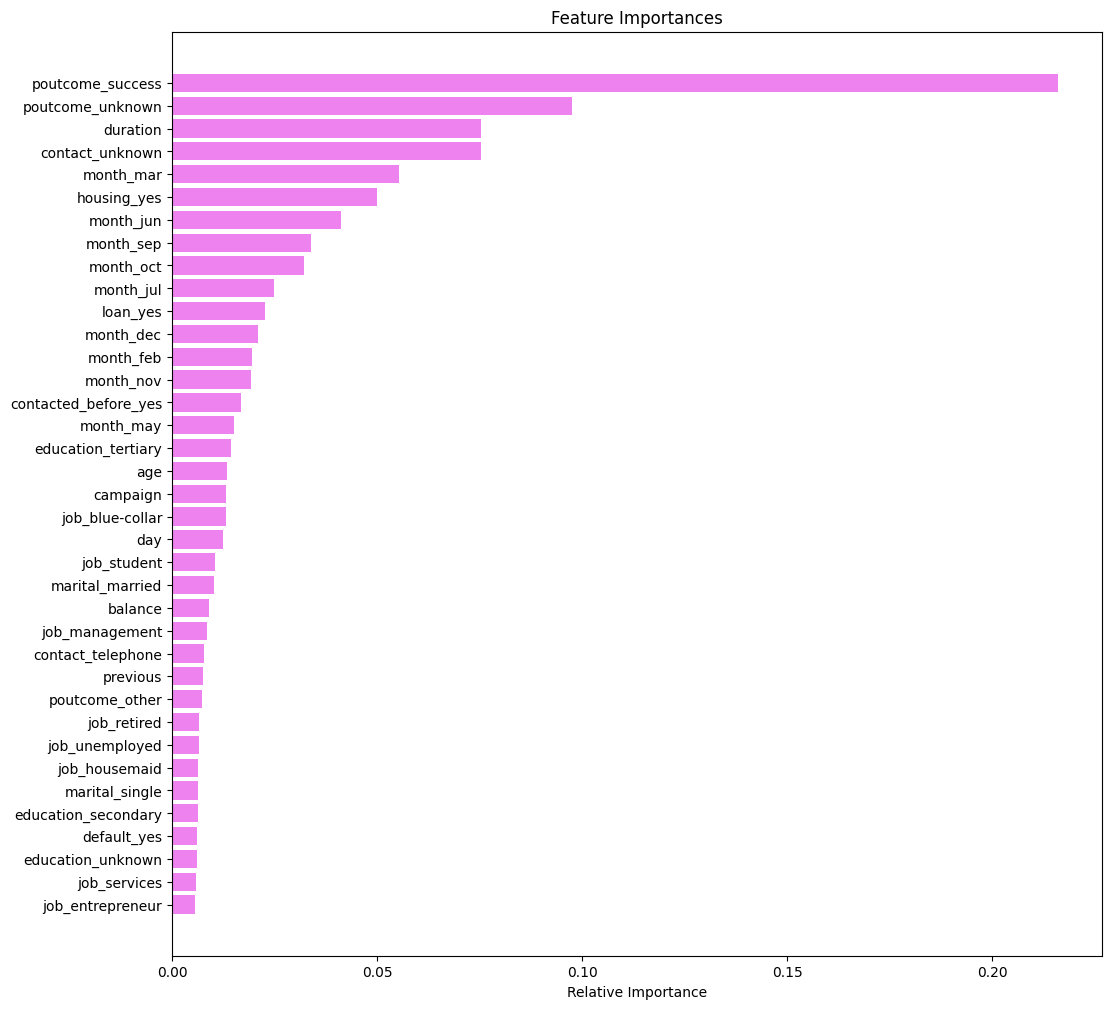

In [128]:
feature_names = X[X_names].columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

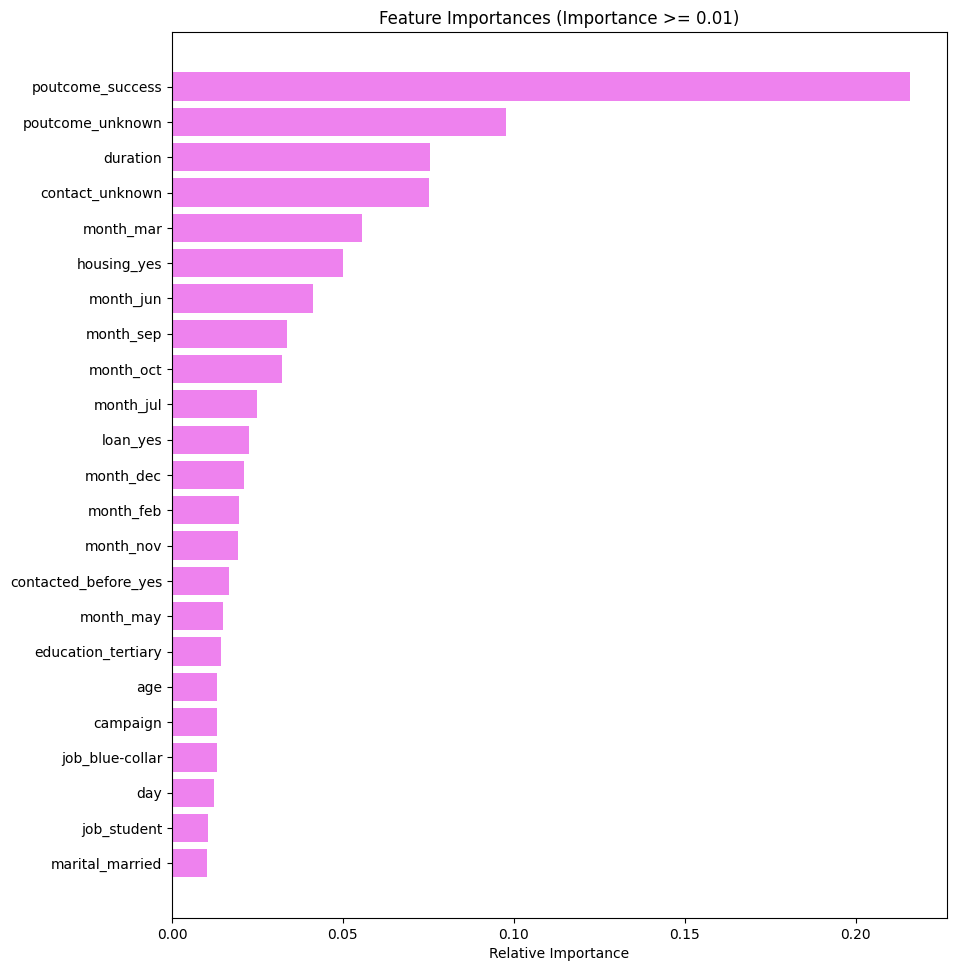

Features with importance >= 0.01:
marital_married: 0.0103
job_student: 0.0106
day: 0.0124
job_blue-collar: 0.0131
campaign: 0.0133
age: 0.0133
education_tertiary: 0.0143
month_may: 0.0150
contacted_before_yes: 0.0168
month_nov: 0.0193
month_feb: 0.0196
month_dec: 0.0211
loan_yes: 0.0226
month_jul: 0.0250
month_oct: 0.0322
month_sep: 0.0338
month_jun: 0.0412
housing_yes: 0.0500
month_mar: 0.0555
contact_unknown: 0.0753
duration: 0.0754
poutcome_unknown: 0.0976
poutcome_success: 0.2159


In [129]:
import matplotlib.pyplot as plt
indices_filtered = [i for i in indices if importances[i] >= 0.01]

plt.figure(figsize=(10, len(indices_filtered) * 0.5))
plt.title("Feature Importances (Importance >= 0.01)")
plt.barh(range(len(indices_filtered)), importances[indices_filtered], color="violet", align="center")
plt.yticks(range(len(indices_filtered)), [feature_names[i] for i in indices_filtered])
plt.xlabel("Relative Importance")
plt.show()

print("Features with importance >= 0.01:")
for i in indices_filtered:
  print(f"{feature_names[i]}: {importances[i]:.4f}")

In [130]:
import pickle

# open the file where you want to store
file = open(file_path+'model.pkl', 'wb')

# dump information on that file
pickle.dump(xgb_tuned, file)

# Close the file
file.close()